# attempting keras + iPy

In [1]:
import numpy as np
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 345us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.1148 - acc: 0.9654 - val_loss: 0.3148 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.0978 - acc: 0.9706 - val_loss: 0.3130 - 

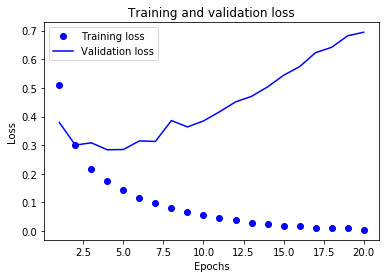

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

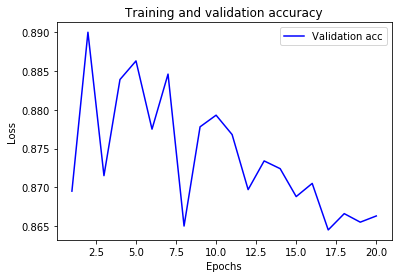

In [7]:
plt.clf()   # clear figure
acc_values =     history.history['acc']
val_acc_values = history.history['val_acc']

#plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
def train_model(hidden=[32,16],act='relu', opt='rmsprop',loss='mse',epochs=10, batch_size=512):
    model = models.Sequential()
    
    # fixed for IMDB
    input_size =10000
    output_size=1
    
    for (indx,depth) in enumerate(hidden):
        if (indx==0):
            model.add(layers.Dense(depth, activation=act, input_shape=(input_size,)))
        else:
            model.add(layers.Dense(depth, activation=act))
            
    # output layer
    model.add(layers.Dense(output_size, activation='sigmoid'))
    
    arch = [input_size, hidden, output_size]

    model.compile(optimizer=opt,
                  loss=loss,
                  metrics=['accuracy'])
    
    print ("Network INFO: ")
    print ("\tLayers:",arch)
    print ("\t Hyper: act=%s opt=%s loss=%s batch_size=%d" %(act,opt,loss,batch_size));
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    results = model.evaluate(x_test, y_test)
    return results

---
# re-train a new network

In [10]:
results = train_model(epochs=10)
results

Network INFO: 
	Layers: [10000, [32, 16], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512
Epoch 1/10
25000/25000 [==============================] - 3s 131us/step - loss: 0.1436 - acc: 0.8200
Epoch 2/10
25000/25000 [==============================] - 3s 115us/step - loss: 0.0744 - acc: 0.9120
Epoch 3/10
25000/25000 [==============================] - 3s 116us/step - loss: 0.0563 - acc: 0.9301
Epoch 4/10
25000/25000 [==============================] - 3s 129us/step - loss: 0.0466 - acc: 0.9440
Epoch 5/10
25000/25000 [==============================] - 3s 133us/step - loss: 0.0387 - acc: 0.9552
Epoch 6/10
25000/25000 [==============================] - 3s 124us/step - loss: 0.0339 - acc: 0.9605
Epoch 7/10
25000/25000 [==============================] - 4s 162us/step - loss: 0.0278 - acc: 0.9686
Epoch 8/10
25000/25000 [==============================] - 3s 127us/step - loss: 0.0240 - acc: 0.9747
Epoch 9/10
25000/25000 [==============================] - 3s 118us/step - loss: 0.0206 - acc:

[0.10775213917732239, 0.86439999999999995]